<a href="https://colab.research.google.com/github/hlepushe/ML_ITMO/blob/Safronycheva-HW3/%D0%9C%D0%9E_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашняя работа 1**



Датасет: https://archive.ics.uci.edu/dataset/186/wine+quality

В своей работе хочу использовать часть датасета, а именно характеристики красного вина.
Бизнес задача: создать модель, которая по содержанию аскорбиновой кислоты в вине определяет его общую кислотность.
ML-задача: регрессия, предсказывание признаков.
Для оценки эффективности обучения и точности прогнозов предлагаю использовать метрики R^2 (коэффициент детерминации), МSЕ и RMSE (корень квадратный из МSЕ), а также МАЕ\. Данные метрики позволят определить, насколько хорошо модель предсказывает кислотность, а также оценить в абсолютных единицах, как сильно она ошибается.

In [1]:
import numpy as np
import pandas as pd
import plotly as pl
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns


импортируем файлы датасета


In [2]:
from google.colab import files

uploaded = files.upload()  #загружался файл winequality-red.csv из исходного датасета


Saving winequality-red.csv to winequality-red.csv


зададим переменную, посмотрим на содержимое файла


In [3]:
df1 = pd.read_csv('winequality-red.csv', sep=';')


In [4]:
print("Содержимое файла:")
print(df1.head())


Содержимое файла:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

Построим таблицу коллинеарности.


In [5]:
corrs = df1.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))
upper_tri

<ipython-input-5-98023673d3bb>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,NaN,NaN,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,NaN,NaN,NaN,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,NaN,NaN,NaN,NaN,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,NaN,NaN,NaN,NaN,NaN,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.341699,0.148506,-0.496180,-0.174919
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196648,0.205633,-0.057731
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093595,0.251397


Из таблицы видно, что признаки citric acid и fixed acidity имеют между собой зависимость. При обучении потребуется использовать модель, которая может работать с такими данными.

In [6]:
num_rows, num_columns = df1.shape
print(f"Количество строк в DataFrame1: {num_rows}")

Количество строк в DataFrame1: 1599


Оставим 1500 строк для удобства

In [7]:
red = df1.head(1500)


Посмотрим на распределения выбранных данных (fixed acidity и citric acid) и на их основные характеристики


Статистика по общей кислотности
count    1500.000000
mean        8.415267
std         1.741944
min         4.600000
25%         7.200000
50%         8.000000
75%         9.300000
max        15.900000
Name: fixed acidity, dtype: float64


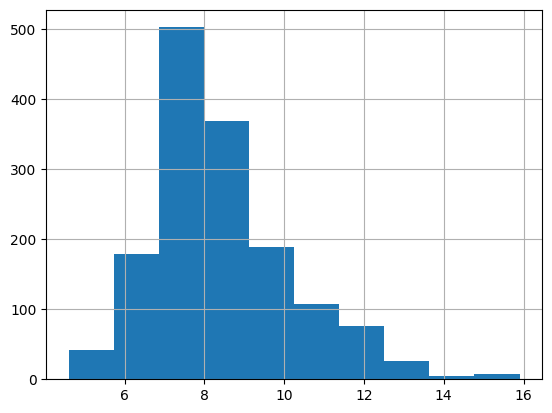

In [8]:
red = red.apply(pd.to_numeric, errors='coerce')
red['fixed acidity'].hist()

print("Статистика по общей кислотности")
stats = red['fixed acidity'].describe()
print(stats)

Из гистограммы видно, что большинство образцов имеют фиксированную кислотность 7-8. Образцов, кислотность которых более 13 не так много. Также нет образцов с кислотностью ниже 4.5

Статистика по содержанию лимонной кислоты
count    1500.000000
mean        0.274980
std         0.195533
min         0.000000
25%         0.100000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64


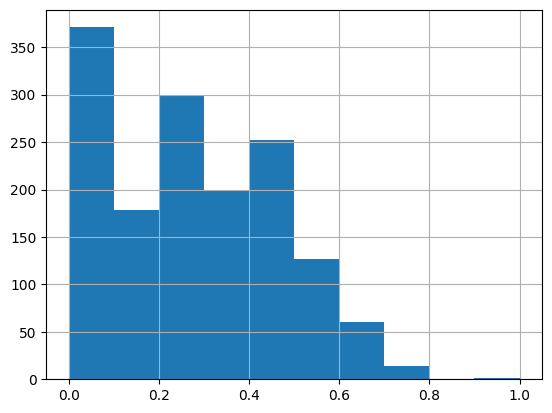

In [9]:
red['citric acid'].hist()

print("Статистика по содержанию лимонной кислоты")
stats = red['citric acid'].describe()
print(stats)

Из гистограммы следует, что польшинство образцов не содержат её вовсе. Самые часто встречающиеся показатели это 0, 20 и 40%. Очень мало образцов имеют высокое содержание кислоты.

Можно заметить, что значения общей кислотности имеют диапазон значений от 4.6 до 15.9. Значения содержания аскорбиновой кислоты выражены в долях от 0 до 1. Стандартное отклонение для значений кислотности невелико (0.19). Для содержания аскорбиновой кислоты этот параметр также равен 1.9.

Создадим еще несколько визуализаций данных

Text(0, 0.5, 'citric acid')

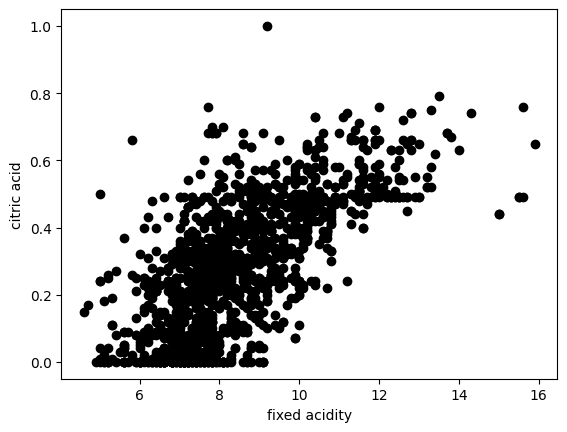

In [10]:
x = pd.DataFrame()
y = pd.DataFrame()

x = red[['fixed acidity']]
y = red[['citric acid']]

plt.scatter(x, y, c = 'black')
plt.xlabel("fixed acidity")
plt.ylabel("citric acid")

данный график показывает зависимость между кислотностью и содержанием аскорбиновой кислоты. Можно наблюдать вытянутое облако точек. Это говорит о том, что между данными присутствует линейная зависимость.

<Axes: >

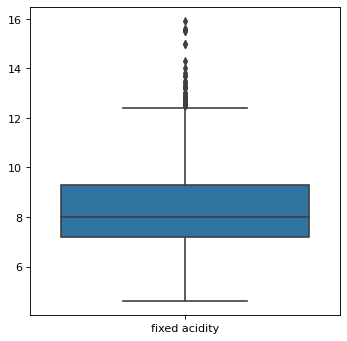

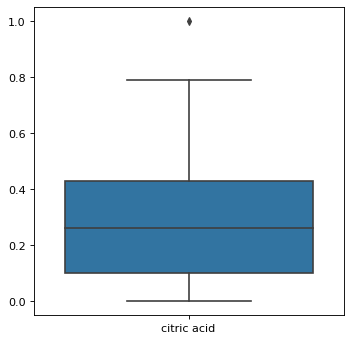

In [11]:
plt.figure(figsize=(5,5), dpi= 80)
sns.boxplot(x, notch=False)

plt.figure(figsize=(5,5), dpi= 80)
sns.boxplot(y, notch=False)

Из боксплотов видно, что в обоих переменных присутствуют выбросы. Однако в переменной citric acid их значительно меньше.

# Домашняя работа 2

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [13]:
X = red['citric acid']
y = red['fixed acidity']


Разобьём выборку на тренировочную и тестовую выборки в пропорции 7:3, зафиксируем random_state

In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    red.drop(columns='fixed acidity'),
    red['fixed acidity'],
    random_state=2030,
    test_size=0.3
)

Будем обучать модель на основе Ridge, так как такая модель умеет работать с данными, в которых присутствует коллинеарность. Также обучим модель dummy regressor на этих же данных для последующего сравнения метрик.

In [15]:
model = Ridge(alpha=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)

Произведем подсчет выбранных метрик для полученной модели.

In [17]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')


MSE: 1.1799003424646712
RMSE: 1.0862321770527106
R^2 Score: 0.6439071831379664
MAE: 0.8144160404435047


По результатам аналица качества обучения, можно сделать вывод, что модель обучилась хорошо, коэффициент детерминации равен 0.99, корень средней квадратичнрй ошибки 0.003, абсолютная ошибка 0.003.

In [18]:
print(f'MSE _dummy: {mean_squared_error(y_test, y_preds_dummy)}')
print(f'RMSE_dummy: {mean_squared_error(y_test, y_preds_dummy, squared=False)}')
print(f'R^2 Score_dummy: {r2_score(y_test, y_preds_dummy)}')
print(f'MAE_dummy: {mean_absolute_error(y_test, y_preds_dummy)}')

MSE _dummy: 3.5801777777777777
RMSE_dummy: 1.8921357714967966
R^2 Score_dummy: -0.08049429589339852
MAE_dummy: 1.4111111111111112


Вычислив аналогичные метрики для Dummy Regressor можно увидеть, что наша модель справилась намного лучше.

#  Домашняя работа 3


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [90]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    red.drop(columns='quality'),
    red['quality'],
    random_state=2023,
    test_size=0.3
)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_f),
    columns=X_train_f.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_f),
    columns=X_test_f.columns
)

In [118]:
rf = RandomForestRegressor(random_state=2023)
rf.fit(X_train_scaled, y_train_f)
y_pred_f = rf.predict(X_test_scaled)
print(f'RMSE: {mean_squared_error(y_test_f, y_pred_f, squared=False)}')
print(f'MSE: {mean_squared_error(y_test_f, y_pred_f)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_pred_f)}')
print(f'R^2: {r2_score(y_test_f, y_pred_f)}')

RMSE: 0.6068666337104974
MSE: 0.36828711111111107
MAE: 0.4439555555555555
R^2: 0.47038589364844907


Проведем оптимизацию гиперпараметров с помощью grid search. Будем изменять количество деревьев и их глубину. Это должно помочь для получения лучших метрик.

In [120]:
parameters = {
    'n_estimators': np.arange(50, 160, 20),
    'max_depth': list(range(3, 11)) + [None],
    'random_state': [2023],
}


grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    n_jobs=2,
    verbose=1,
    cv=3,
)

In [121]:
grid_search.fit(X_train_scaled, y_train_f)

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
max_depth: None
n_estimators: 150
random_state: 2023


In [122]:
y_pred_fin = grid_search.best_estimator_.predict(X_test_scaled)
print(f'RMSE: {mean_squared_error(y_test_f, y_pred_fin, squared=False)}')
print(f'MSE: {mean_squared_error(y_test_f, y_pred_fin)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_pred_fin)}')
print(f'R^2: {r2_score(y_test_f, y_pred_fin)}')

RMSE: 0.6071501532915686
MSE: 0.36863130864197524
MAE: 0.4448
R^2: 0.4698909214861948


Можно заметить, что данный способ оптимизации практически не изменил основные метрики модели. Попробуем применить другой оптимизатор на тех же параметрах модели.

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [125]:
parameters = {
    'n_estimators': np.arange(50, 160, 200),
    'max_depth': list(range(3, 11)),
    'random_state': [2023],
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=parameters,
    n_iter=20,
    n_jobs=2,
    verbose=1,
    cv=3,
)
random_search.fit(X_train_scaled, y_train_f)

best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
max_depth: 10
n_estimators: 50
random_state: 2023


In [126]:
y_pred_fin = random_search.best_estimator_.predict(X_test_scaled)
print(f'RMSE: {mean_squared_error(y_test_f, y_pred_fin, squared=False)}')
print(f'MSE: {mean_squared_error(y_test_f, y_pred_fin)}')
print(f'MAE: {mean_absolute_error(y_test_f, y_pred_fin)}')
print(f'R^2: {r2_score(y_test_f, y_pred_fin)}')

RMSE: 0.6196061941195053
MSE: 0.3839118357912582
MAE: 0.46527664092240045
R^2: 0.44791680812031454


Данный способ лишь ухудшил метрики. Можно предположить, что были подобраны неоптимальные границы подбора или присутствует недостаток данных. Осуществленный перебор границ параметров не привел к значительному улучшению метрик.

Инструмент Optuna для автоматического подбора оптимальных гиперпараметров не получилось применить на этих данных. Оптимизировать данные для работы с этим инструментом также не получилось

Построим несколько наглядных визуализаций нашей модели. Будем использовать permutation importance и feature importances

In [51]:
from sklearn.inspection import permutation_importance

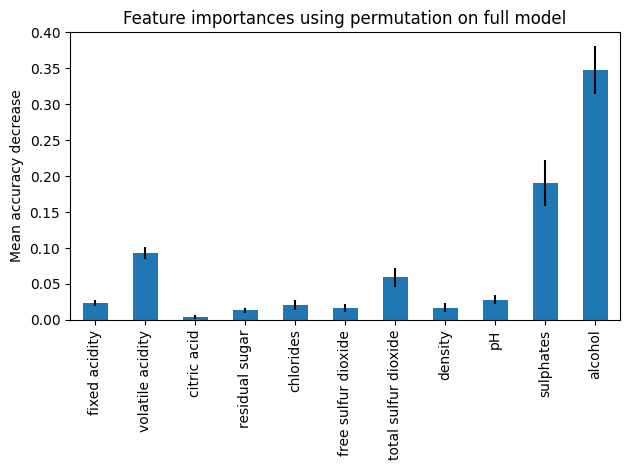

In [96]:
importances = permutation_importance(rf, X_test_scaled, y_test_f, n_repeats=10, random_state=2023, n_jobs=2)
forest_importances = pd.Series(importances.importances_mean, index=X_train_scaled.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

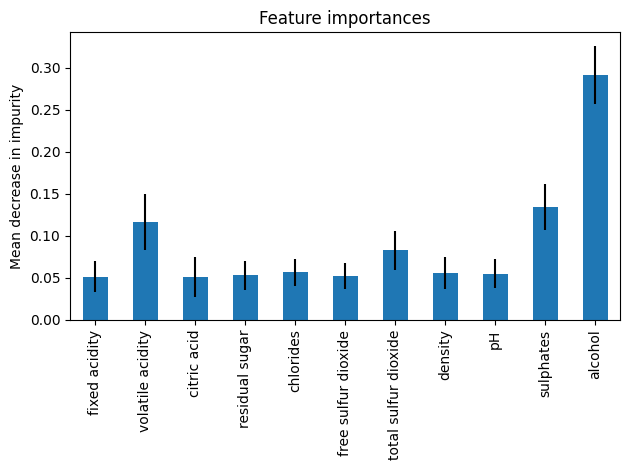

In [97]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train_scaled.columns)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity", )
fig.tight_layout()

Из этих графиков следует, чтобольше всего на качество вина влияет содержание алкоголя и количество сульфатов. Оба графика показывают высокую важность этих признака в определении целевой переменной. Остальные переменные мало влияют на качество предсказания модели, хотя летучая кислотность (volatile acidity) имеет свой вклад в качество вина, хотя и не такой большой, как у первых двух описанных.